# Dijkstra path finding algorithm

Created by - Sanjana Tule

Date - 26/08/2021

In [1]:
# !pip install osmnx
# !apt install python3-rtree

In [2]:
# import libraries
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import geopandas
import requests
import osmnx as ox
import networkx as nx
import numpy as np
from geopy.geocoders import Nominatim
import math
import time
import warnings
warnings.filterwarnings("ignore")

# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## PART 2 - PATH FINDING USING ABSTRACT AND DETAILED GRAPH

In [3]:
# Load abstract and detailed graph
graph_detailed = nx.read_gpickle('/content/drive/My Drive/omdena/earthquake/2_all_graph_all_risk_added.pickle')
graph_abstract = nx.read_gpickle('/content/drive/My Drive/omdena/earthquake/3_abstract_graph.pickle')

In [13]:
 ##################################### PART 2 - FIND THE ROUTE #################################################################
 ###############################################################################################################################

# euclidean distance
def get_euclidean_distance(s_x,s_y,geom):
    return ox.distance.euclidean_dist_vec(s_y,s_x,geom.bounds[1],geom.bounds[0])

# nearest park
def find_nearest_park_shelter(graph_detailed,source_point,type):
  nodes_park,_ = ox.graph_to_gdfs(graph_detailed)
  nodes_park = nodes_park[nodes_park['evacuation_type']== type]
  
  euc_distance_parks = nodes_park.geometry.apply(lambda x: get_euclidean_distance(source_point[0],source_point[1],x))
  return euc_distance_parks.sort_values().index.values[0]
  
# find shortest route
def find_route(source_address,destination_address,choice_of_destination,graph_detailed,graph_abstract):
  
  # record time
  start_time = time.time()

  # find the nearest source node to the address
  geolocator = Nominatim(user_agent="Nominatim")
  #source_latlon = geolocator.geocode("19130 Tulsa St, Northridge, CA 91326")
  source_latlon = geolocator.geocode(source_address)
  source_point = (source_latlon.latitude, source_latlon.longitude)
  print("source_address_point",source_point)

  # find nearest node to the address in the detailed graph
  source_node, source_dist = ox.get_nearest_node(graph_detailed,source_point,return_dist=True)
  print('source node in detailed graph',source_node)

  # find the destination if not given
  if choice_of_destination == 1: # park
    dest_node = find_nearest_park_shelter(graph_detailed,source_point,'park')
    print('Destination node in detailed graph',dest_node)
  elif choice_of_destination == 2: # shelter
    dest_node = find_nearest_park_shelter(graph_detailed,source_point,'shelter')
    print('Destination node in detailed graph',dest_node)
  else:
    # find the nearest source node to the address
    dest_latlon = geolocator.geocode(destination_address)
    dest_point = (dest_latlon.latitude, dest_latlon.longitude)
    # find nearest node to the address in the detailed graph
    dest_node, dest_dist = ox.get_nearest_node(graph_detailed,dest_point,return_dist=True)
    print('Destination node in detailed graph',dest_node)
  
  # find the shortest path betwen destination node in detailed graph to the destination node in the abstract graph
  complete_path = nx.shortest_path(G =graph_detailed,source=source_node, target=dest_node, weight='combined_risk', method='dijkstra')
  print("ROUTE",complete_path)

  A_time = (time.time() - start_time)
  print("TOTAL TIME",A_time)

  # Plot route
  fig, ax = ox.plot_graph_route(graph_detailed, complete_path, route_linewidth=6, node_size=0, bgcolor='k',figsize=(20,20))

  # length and risk
  total_length = sum(nx.Graph(graph_detailed)[u][v].get('length') for u, v in zip(complete_path[:-1], complete_path[1:]))
  total_risk = sum(nx.Graph(graph_detailed)[u][v].get('combined_risk') for u, v in zip(complete_path[:-1], complete_path[1:]))

  # total length and risk
  print("LENGTH OF THE ROUTE",total_length)
  print("RISK OF THE ROUTE",total_risk)

DEMO 1 - 
FIND PATH FOR CUSTOM DESTINATION

Enter your Current Address.19130 Tulsa St, Northridge, CA 91326
Where to you want to go? 
 1.Nearest Park 
 2.Nearest Shelter 
 3.Custom Destination 
 Type 1, 2 or 3 
3
Please give the Custom Destination Address.7741 Hayvenhurst Ave, Van Nuys, CA 91406
source_address_point (34.268061477640316, -118.55029582917044)
source node in detailed graph 122698946
Destination node in detailed graph 7173953826
ROUTE [122698946, 122960456, 122977106, 122977109, 7241989387, 122977113, 7241989386, 6571814474, 123105446, 6571814471, 123105445, 7241989384, 4269314469, 4269314487, 7159764095, 5668293739, 6522417636, 6317320093, 5634859230, 4269314369, 4269314375, 652284868, 652284955, 6028035278, 4269314389, 8609738240, 123014512, 6654270703, 6654270704, 6654270716, 7036420546, 6028034853, 6028034854, 6654270697, 6654270699, 6654270698, 122720291, 3566621202, 7904507589, 122757510, 6699160771, 122849536, 122849534, 122849531, 122849529, 294188611, 294188610, 6432919609, 123117770, 6432919605, 6762955187

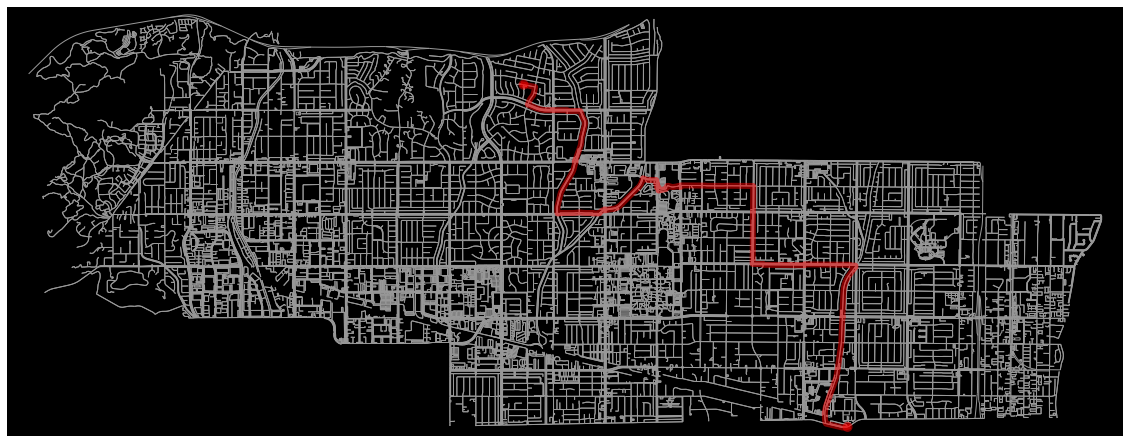

LENGTH OF THE ROUTE 12280.925000000005
RISK OF THE ROUTE 164.30222734254986


In [14]:
###### MAIN FUNCTION - CUSTOM DESTINATION #####

source_address = input('Enter your Current Address.')
choice_of_destination = int(input('Where to you want to go? \n 1.Nearest Park \n 2.Nearest Shelter \n 3.Custom Destination \n Type 1, 2 or 3 \n'))

if choice_of_destination not in (1,2,3):
  print("Wrong Choice")

if choice_of_destination == 3:
  destination_address = input('Please give the Custom Destination Address.')
else:
  destination_address = 'NA'
  
# find shortest route and plot it
find_route(source_address,destination_address,choice_of_destination,graph_detailed,graph_abstract)

# Demo purposes - option 3
# Source Address = 19130 Tulsa St, Northridge, CA 91326
# Destination Address = '7741 Hayvenhurst Ave, Van Nuys, CA 91406'

Enter your Current Address 22801 Santa Susana Pass Rd, Chatsworth, CA 91311
Where to you want to go? 
 1.Nearest Park 
 2.Nearest Shelter 
 3.Custom Destination 
 Type 1, 2 or 3 
3
Please give the Custom Destination Address.8418 Noble Ave, North Hills, CA 91326
source_address_point (34.274221667539265, -118.62280866492146)
source node in detailed graph 3950442021
Destination node in detailed graph 122893551
ROUTE [3950442021, 5292556391, 123378816, 2857316764, 3950522644, 123378844, 122502372, 123256081, 6784129522, 123136223, 6784129514, 6784129512, 298063090, 4691652417, 4691652416, 298062827, 298062793, 298062625, 331380001, 331380117, 331382126, 1363196382, 331379294, 6317548705, 122404753, 6317548711, 123159112, 6317548709, 365014730, 7241988621, 123095939, 122746386, 5668394129, 123227237, 5668301922, 5668299958, 4269349055, 4280634700, 123105428, 6477025074, 6477025024, 123541370, 5668291822, 6790323781, 7054392525, 6790327098, 6477025037, 123014518, 6477025034, 7496540837, 7496

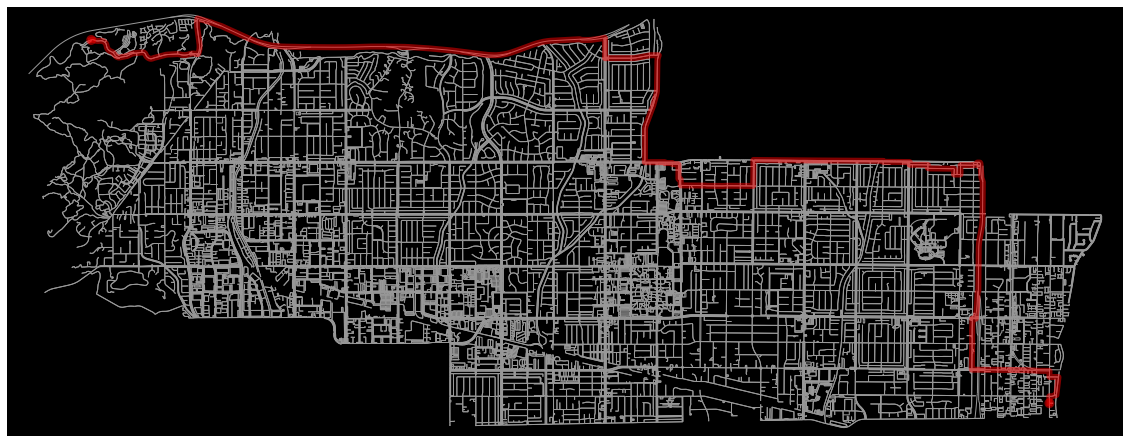

LENGTH OF THE ROUTE 23278.053000000014
RISK OF THE ROUTE 246.47268305171548


In [15]:
###### MAIN FUNCTION - CUSTOM DESTINATION #####

source_address = input('Enter your Current Address ')
choice_of_destination = int(input('Where to you want to go? \n 1.Nearest Park \n 2.Nearest Shelter \n 3.Custom Destination \n Type 1, 2 or 3 \n'))

if choice_of_destination not in (1,2,3):
  print("Wrong Choice")

if choice_of_destination == 3:
  destination_address = input('Please give the Custom Destination Address.')
else:
  destination_address = 'NA'
  
# find shortest route and plot it
find_route(source_address,destination_address,choice_of_destination,graph_detailed,graph_abstract)

# Demo purposes - option 3
# Source Address = 22801 Santa Susana Pass Rd, Chatsworth, CA 91311
# Destination Address = 8418 Noble Ave, North Hills, CA 91326

Enter your Current Address 22801 Santa Susana Pass Rd, Chatsworth, CA 91311
Where to you want to go? 
 1.Nearest Park 
 2.Nearest Shelter 
 3.Custom Destination 
 Type 1, 2 or 3 
3
Please give the Custom Destination Address.7741 Hayvenhurst Ave, Van Nuys, CA 91406
source_address_point (34.274221667539265, -118.62280866492146)
source node in detailed graph 3950442021
Destination node in detailed graph 7173953826
ROUTE [3950442021, 5292556391, 123378816, 2857316764, 3950522644, 123378844, 122502372, 123256081, 6784129522, 123136223, 6784129514, 6784129512, 298063090, 4691652417, 4691652416, 298062827, 298062793, 298062625, 331380001, 331380117, 331382126, 1363196382, 331379294, 6317548705, 122404753, 6317548711, 123159112, 6317548709, 365014730, 7241988621, 123095939, 122746386, 5668394129, 123227237, 5668301922, 5668299958, 4269349055, 4280634700, 123105428, 6477025074, 6477025024, 123541370, 5668291822, 6790323781, 7054392525, 6790327098, 6477025037, 123014518, 6477025034, 7496540837, 

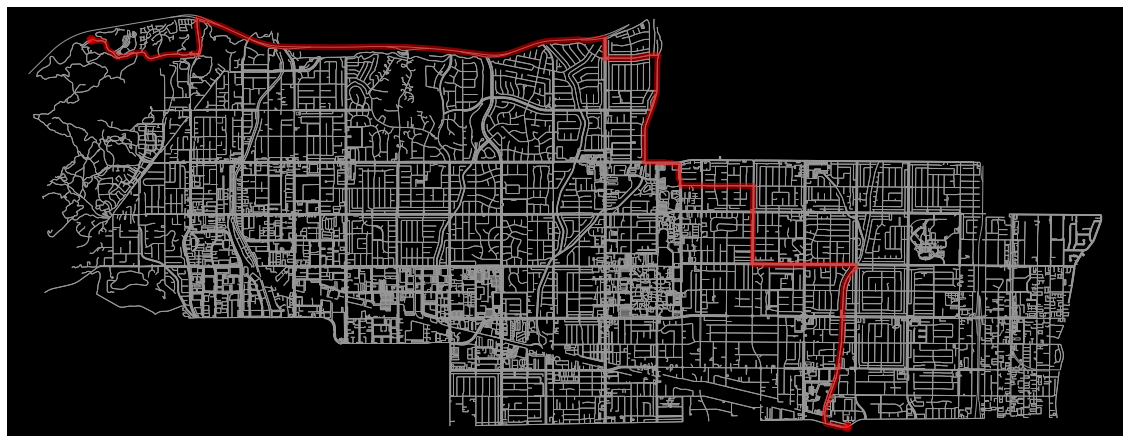

LENGTH OF THE ROUTE 19474.313
RISK OF THE ROUTE 182.04516129032254


In [16]:
###### MAIN FUNCTION - CUSTOM DESTINATION #####

source_address = input('Enter your Current Address ')
choice_of_destination = int(input('Where to you want to go? \n 1.Nearest Park \n 2.Nearest Shelter \n 3.Custom Destination \n Type 1, 2 or 3 \n'))

if choice_of_destination not in (1,2,3):
  print("Wrong Choice")

if choice_of_destination == 3:
  destination_address = input('Please give the Custom Destination Address.')
else:
  destination_address = 'NA'
  
# find shortest route and plot it
find_route(source_address,destination_address,choice_of_destination,graph_detailed,graph_abstract)

# Demo purposes - option 3
# Source Address = 22801 Santa Susana Pass Rd, Chatsworth, CA 91311
# Destination Address = 7741 Hayvenhurst Ave, Van Nuys, CA 91406

DEMO 2 - 
FIND PATH FOR NEAREST PARK


Enter your Current Address 19130 Tulsa St, Northridge, CA 91326
Where to you want to go? 
 1.Nearest Park 
 2.Nearest Shelter 
 3.Custom Destination 
 Type 1, 2 or 3 
1
source_address_point (34.268061477640316, -118.55029582917044)
source node in detailed graph 122698946
Destination node in detailed graph 4489631571
ROUTE [122698946, 122960456, 122977106, 122977109, 7241989387, 122977113, 7241989386, 6571814474, 123105446, 6571814471, 123105445, 7241989384, 4269314469, 4269314487, 7159764095, 5668293739, 6522417636, 6317320093, 5634859230, 4269314369, 4269314375, 652284868, 652284955, 6028035278, 4269314389, 8609738240, 123014512, 6654270703, 6654270704, 6654270716, 7036420546, 6028034853, 6028034854, 6654270697, 6654270699, 6654270698, 122720291, 3566621202, 7904507589, 122757510, 6699160771, 122849536, 122849534, 122849531, 122849529, 294188611, 294188610, 6432919609, 6413016385, 6432919623, 6432919689, 7362288778, 7911814810, 7911814813, 6432919640, 6468789653, 59834057, 6468789650,

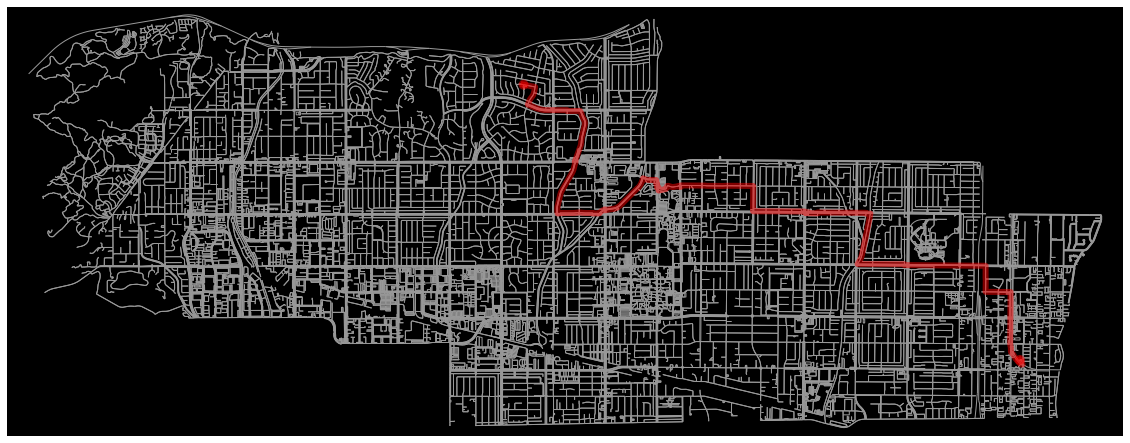

LENGTH OF THE ROUTE 13749.978000000001
RISK OF THE ROUTE 214.24336917562704


In [17]:
###### MAIN FUNCTION - NEAREST PARK #####

source_address = input('Enter your Current Address ')
choice_of_destination = int(input('Where to you want to go? \n 1.Nearest Park \n 2.Nearest Shelter \n 3.Custom Destination \n Type 1, 2 or 3 \n'))

if choice_of_destination not in (1,2,3):
  print("Wrong Choice")

if choice_of_destination == 3:
  destination_address = input('Please give the Custom Destination Address.')
else:
  destination_address = 'NA'
  
# find shortest route and plot it
find_route(source_address,destination_address,choice_of_destination,graph_detailed,graph_abstract)


DEMO 3 - 
FIND PATH FOR NEAREST SHELTER

Enter your Current Address 19130 Tulsa St, Northridge, CA 91326
Where to you want to go? 
 1.Nearest Park 
 2.Nearest Shelter 
 3.Custom Destination 
 Type 1, 2 or 3 
2
source_address_point (34.268061477640316, -118.55029582917044)
source node in detailed graph 122698946
Destination node in detailed graph 4622737603
ROUTE [122698946, 122960456, 122977106, 122977109, 7241989387, 122977113, 7241989386, 6571814474, 123105446, 6571814471, 123105445, 7241989384, 4269314469, 4269314487, 7159764095, 5668293739, 6522417636, 6317320093, 5634859230, 4269314369, 4269314375, 652284868, 652284955, 6028035278, 4269314389, 8609738240, 123014512, 6654270703, 6654270704, 6654270716, 7036420546, 6028034853, 6028034854, 6654270697, 6654270699, 6654270698, 122720291, 3566621202, 7904507589, 122757510, 6699160771, 122849536, 122849534, 122849531, 122849529, 294188611, 294188610, 6432919609, 6413016385, 6432919623, 6432919689, 7362288778, 7911814810, 7911814813, 6432919640, 6468789653, 59834057, 6468789650,

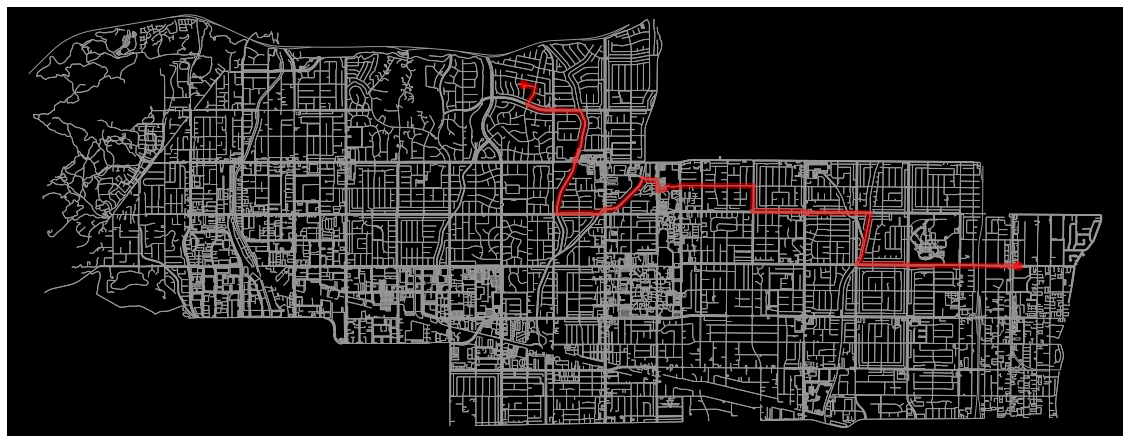

LENGTH OF THE ROUTE 12158.651
RISK OF THE ROUTE 188.24633896569372


In [18]:
###### MAIN FUNCTION - NEAREST SHELTER #####

source_address = input('Enter your Current Address ')
choice_of_destination = int(input('Where to you want to go? \n 1.Nearest Park \n 2.Nearest Shelter \n 3.Custom Destination \n Type 1, 2 or 3 \n'))

if choice_of_destination not in (1,2,3):
  print("Wrong Choice")

if choice_of_destination == 3:
  destination_address = input('Please give the Custom Destination Address.')
else:
  destination_address = 'NA'
  
# find shortest route and plot it
find_route(source_address,destination_address,choice_of_destination,graph_detailed,graph_abstract)